# imports for program

In [395]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ridge_regression
import ast
import matplotlib.pyplot as plt

# Creation of the data element

In [396]:
Data = pd.read_csv('merged_steam_data.csv')
Data

,appid,name_x,price_x,ccu,type,name_y,required_age,is_free,controller_support,dlc,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,10,Counter-Strike,999.0,16360,game,Counter-Strike,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 118156},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,220,Half-Life 2,999.0,1177,game,Half-Life 2,0.0,False,NaN,[323140],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 904, 'name': 'Half-Life 2 Trailer', 't...",{'total': 103743},"{'total': 33, 'highlighted': [{'name': 'Defian...","{'coming_soon': False, 'date': '16 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/220', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
2,240,Counter-Strike: Source,999.0,7752,game,Counter-Strike: Source,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 87660},"{'total': 147, 'highlighted': [{'name': 'Someo...","{'coming_soon': False, 'date': '1 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/240', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
3,550,Left 4 Dead 2,999.0,20328,game,Left 4 Dead 2,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 5952, 'name': 'Left 4 Dead - The Sacri...",{'total': 418847},"{'total': 101, 'highlighted': [{'name': 'CL0WN...","{'coming_soon': False, 'date': '16 Nov, 2009'}","{'url': 'http://steamcommunity.com/app/550', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Left 4 Dead 2 featur..."
4,620,Portal 2,199.0,2793,game,Portal 2,0.0,False,full,[323180],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 81613, 'name': 'Portal 2 - Perpetual T...",{'total': 227268},"{'total': 51, 'highlighted': [{'name': 'Wake U...","{'coming_soon': False, 'date': '18 Apr, 2011'}","{'url': 'http://steamcommunity.com/app/620', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1593500,God of War,4999.0,12509,game,God of War,18,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 256864004, 'name': 'Features Trailer',...",{'total': 19841},"{'total': 37, 'highlighted': [{'name': 'Father...","{'coming_soon': False, 'date': '14 Jan, 2022'}",{'url': 'https://support.sms.playstation.com/h...,https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Gameplay consists of..."
335,1677740,Stumble Guys,799.0,4423,game,Stumble Guys,0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 16, 'path_thumbnail': 'https://cdn.aka...","[{'id': 256856802, 'name': 'Stumble Guys out o...",{'total': 1046},NaN,"{'coming_soon': False, 'date': '7 Oct, 2021'}","{'url': '', 'email': 'support@kitkagames.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
336,1794680,Vampire Survivors,299.0,52451,game,Vampire Survivors,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-pla

# checking genres available

In [397]:
Data = Data.dropna(subset='genres')
genres = {""}

for i in Data.loc[:, "genres"]:
    literal = ast.literal_eval(i)
    for x in literal:
        genres.add(x ["description"])
        #print(x ["description"])

genres

{'',
 'Action',
 'Adventure',
 'Casual',
 'Early Access',
 'Indie',
 'Massively Multiplayer',
 'RPG',
 'Racing',
 'Simulation',
 'Sports',
 'Strategy'}

In [398]:
Action = Data[0:0]
Adventure = Data[0:0]
Casual = Data[0:0]
EarlyAccess = Data[0:0]
Indie = Data[0:0]
MassivelyMultiplayer = Data[0:0]
RPG = Data[0:0]
Racing = Data[0:0]
Simulation = Data[0:0]
Sports = Data[0:0]
Strategy = Data[0:0]

for i,x in Data.iterrows():
    if 'Action' in x ["genres"]:
        Action.loc[len(Action)] = x

    if 'Adventure' in x ["genres"]:
        Adventure.loc[len(Action)] = x
    
    if 'Casual' in x ["genres"]:
        Casual.loc[len(Action)] = x
    
    if 'Early Access' in x ["genres"]:
        EarlyAccess.loc[len(Action)] = x
    
    if 'Indie' in x ["genres"]:
        Indie.loc[len(Action)] = x
    
    if 'Massively Multiplayer' in x ["genres"]:
        MassivelyMultiplayer.loc[len(Action)] = x
    
    if 'RPG' in x ["genres"]:
        RPG.loc[len(Action)] = x
    
    if 'Simulation' in x ["genres"]:
        Simulation.loc[len(Action)] = x
    
    if 'Sports' in x ["genres"]:
        Sports.loc[len(Action)] = x
    
    if 'Strategy' in x ["genres"]:
        Strategy.loc[len(Action)] = x
    
    

Action.loc[:, "genres"] = 'Action'
Action = Action.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Adventure.loc[:, "genres"] = 'Adventure'
Adventure = Adventure.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Casual.loc[:, "genres"] = 'Casual'
Casual = Casual.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

EarlyAccess.loc[:, "genres"] = 'Early Access'
EarlyAccess = EarlyAccess.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Indie.loc[:, "genres"] = 'Indie'
Indie = Indie.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

MassivelyMultiplayer.loc[:, "genres"] = 'Massively Multiplayer'
MassivelyMultiplayer = MassivelyMultiplayer.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

RPG.loc[:, "genres"] = 'RPG'
RPG = RPG.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Simulation.loc[:, "genres"] = 'Simulation'
Simulation = Simulation.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Sports.loc[:, "genres"] = 'Sports'
Sports = Sports.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Strategy.loc[:, "genres"] = 'Strategy'
Strategy = Strategy.loc[:,['name_x', 'price_x', 'ccu', 'genres']]


RelevantData = pd.concat([Action, Adventure, Casual, EarlyAccess, Indie, MassivelyMultiplayer, RPG, Simulation, Sports, Strategy], ignore_index=True)


C:\Users\n-rasmussen\AppData\Local\Temp\ipykernel_28352\3972567753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Action.loc[len(Action)] = x
C:\Users\n-rasmussen\AppData\Local\Temp\ipykernel_28352\3972567753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Action.loc[len(Action)] = x
C:\Users\n-rasmussen\AppData\Local\Temp\ipykernel_28352\3972567753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Action.loc[len(Action)]

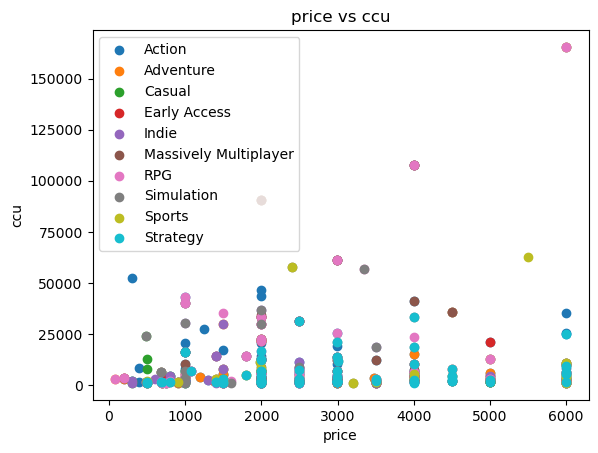

In [399]:


fig, ax = plt.subplots()

genres = RelevantData["genres"].unique()

for g in genres:
  x = RelevantData.loc[RelevantData.genres == g, 'price_x']
  y = RelevantData.loc[RelevantData.genres == g, 'ccu']

  ax.scatter(x,y, label = g)

ax.set_xlabel("price")
ax.set_ylabel("ccu")
ax.set_title("price vs ccu")
ax.legend()

In [401]:
#model = ridge_regression()


for g in genres:
  x = RelevantData.loc[RelevantData.genres == g, 'price_x']
  y = RelevantData.loc[RelevantData.genres == g, 'ccu']
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

  


param = {
    "alpha": range(0, 20)
}



[999.0,
 3999.0,
 1999.0,
 2999.0,
 999.0,
 2999.0,
 3999.0,
 1399.0,
 3999.0,
 1499.0,
 3999.0,
 2999.0,
 1999.0,
 5999.0,
 1999.0,
 1999.0,
 999.0,
 1999.0,
 1249.0,
 3999.0,
 2999.0,
 2999.0,
 1499.0,
 3999.0,
 749.0,
 999.0,
 499.0,
 2999.0,
 2499.0,
 2999.0,
 5999.0,
 2999.0,
 799.0,
 1999.0,
 2499.0,
 1499.0,
 4999.0,
 2499.0,
 399.0,
 999.0,
 1999.0,
 2999.0,
 1999.0,
 1999.0,
 5999.0,
 1999.0,
 799.0,
 1999.0,
 4999.0,
 1499.0,
 5999.0,
 1999.0,
 1374.0,
 1999.0,
 3999.0,
 1999.0,
 1999.0,
 5999.0,
 1499.0,
 2999.0,
 4999.0,
 5999.0,
 1999.0,
 1999.0,
 3999.0,
 5999.0,
 3999.0,
 5999.0,
 1999.0,
 4999.0,
 4999.0,
 899.0,
 1999.0,
 5999.0,
 2999.0,
 3499.0,
 3499.0,
 2999.0,
 4499.0,
 999.0,
 999.0,
 3999.0,
 3999.0,
 1399.0,
 2999.0,
 2999.0,
 2999.0,
 1479.0,
 4999.0,
 4999.0,
 1999.0,
 999.0,
 1499.0,
 199.0,
 3479.0,
 4499.0,
 5999.0,
 4999.0,
 5999.0,
 699.0,
 2499.0,
 1999.0,
 2999.0,
 1399.0,
 1999.0,
 5999.0,
 1199.0,
 1999.0,
 399.0,
 5999.0,
 999.0,
 1999.0,
 1999.0,
 